In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [3]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16

In [6]:
from tensorflow.keras.callbacks import Callback
from timeit import default_timer as timer

class TimingCallback(Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

In [7]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

early_stopping = EarlyStopping(
                                patience=5,
                                min_delta = 0.01,
                                verbose=1,
                                mode = 'min',
                                monitor='val_loss')

reduce_learning_rate = ReduceLROnPlateau(
                                    monitor="val_loss",
                                    patience=3,
                                    episilon= 0.01,
                                    factor=0.1,
                                    cooldown = 4,
                                    verbose=1)

time_callback = TimingCallback()

In [8]:
n_class=38
base_model = VGG16(weights='imagenet', include_top=False)
for layer in base_model.layers: 
    layer.trainable = False
model=Sequential()

In [9]:
model.add(base_model)
model.add(GlobalAveragePooling2D()) 
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(n_class, activation='softmax'))

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                        

In [12]:
batch_size = 128
epochs = 20 
model_history = model.fit(
            training_set,
            validation_data =validation_set,
            epochs = epochs,
            callbacks = [
                         reduce_learning_rate,
                         early_stopping,
                         time_callback
                        ],
            verbose=True)

Epoch 1/20
2197/2197 [==============================] - 1249s 568ms/step - loss: 0.6345 - acc: 0.8140 - val_loss: 0.3805 - val_acc: 0.8800 - lr: 0.0010
Epoch 2/20
2197/2197 [==============================] - 1279s 582ms/step - loss: 0.3576 - acc: 0.8882 - val_loss: 0.3094 - val_acc: 0.9041 - lr: 0.0010
Epoch 3/20
2197/2197 [==============================] - 1270s 578ms/step - loss: 0.3062 - acc: 0.9045 - val_loss: 0.2899 - val_acc: 0.9108 - lr: 0.0010
Epoch 4/20
2197/2197 [==============================] - 1274s 580ms/step - loss: 0.2704 - acc: 0.9176 - val_loss: 0.2529 - val_acc: 0.9273 - lr: 0.0010
Epoch 5/20
2197/2197 [==============================] - 1258s 573ms/step - loss: 0.2540 - acc: 0.9237 - val_loss: 0.2458 - val_acc: 0.9310 - lr: 0.0010
Epoch 6/20
2197/2197 [==============================] - 1268s 577ms/step - loss: 0.2426 - acc: 0.9289 - val_loss: 0.2401 - val_acc: 0.9311 - lr: 0.0010
Epoch 7/20
2197/2197 [==============================] - 1262s 574ms/step - loss: 0.2381 

In [17]:
model.save("Plant Recongnition_VGG16_Mustafa_v2.keras")

In [18]:
model_history.history

{'loss': [0.6344758868217468,
  0.35758864879608154,
  0.30622023344039917,
  0.2703637480735779,
  0.2540102005004883,
  0.2425936609506607,
  0.23805877566337585,
  0.22177159786224365,
  0.21007205545902252,
  0.11906229704618454,
  0.08092604577541351,
  0.07033278048038483,
  0.060826756060123444,
  0.05626161769032478,
  0.051497627049684525,
  0.04719683527946472,
  0.04377850145101547],
 'acc': [0.8140265941619873,
  0.8881997466087341,
  0.904488205909729,
  0.9175901412963867,
  0.9236787557601929,
  0.9288569688796997,
  0.9320719838142395,
  0.9358702898025513,
  0.9415321350097656,
  0.9645636081695557,
  0.9743082523345947,
  0.9773525595664978,
  0.9794437885284424,
  0.9810655117034912,
  0.9819759726524353,
  0.9843089580535889,
  0.9854328036308289],
 'val_loss': [0.38047462701797485,
  0.3093625009059906,
  0.28986212611198425,
  0.25289100408554077,
  0.24578353762626648,
  0.2400696724653244,
  0.2414005845785141,
  0.26787567138671875,
  0.292140394449234,
  0.175

In [72]:
max=len(model_history.history['loss'])+1
epochs=[i for i in range(1,max)]
epochs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

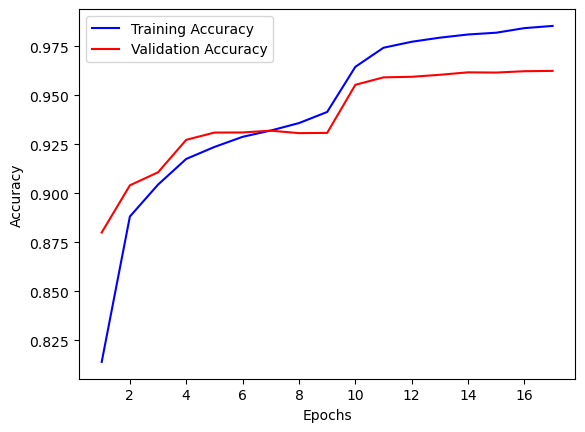

In [75]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.plot(np.arange(1,max,1),
         model_history.history['acc'],
         label='Training Accuracy',
         color='blue'
        )

plt.plot(np.arange(1 , 18, 1),
         model_history.history['val_acc'], 
         label = 'Validation Accuracy',
         color = 'red')

plt.legend()
plt.show()


In [42]:
classes=validation_set.class_names
classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [43]:
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [44]:
y_pred=model.predict(test_set)
print(y_pred)
print(y_pred.shape)


550/550 [==============================] - 190s 345ms/step
[[9.99999940e-01 3.89225246e-18 4.35779386e-22 ... 0.00000000e+00
  1.30435524e-30 6.24272324e-31]
 [9.99999940e-01 8.26152592e-17 3.81691173e-14 ... 2.99817893e-34
  6.88156003e-28 7.92356668e-26]
 [9.99999821e-01 1.40616237e-07 1.56201285e-09 ... 1.20294939e-22
  6.97042629e-16 1.38352015e-14]
 ...
 [1.04362152e-17 5.04200058e-20 3.41952744e-10 ... 6.69277064e-22
  3.02989024e-26 1.00000000e+00]
 [5.26774453e-22 7.54800834e-27 1.58355573e-19 ... 1.45838778e-21
  1.63714613e-22 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]
(17572, 38)


In [45]:
y_pred_argmax=tf.argmax(y_pred,axis=1)
y_pred_argmax

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [46]:
actual_class=tf.concat([y for x,y in test_set],axis=0)
actual_class

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [58]:
y_true_argmax=tf.argmax(actual_class,axis=1)

In [59]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

print(metrics.classification_report(y_true_argmax,y_pred_argmax))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       504
           1       0.98      0.98      0.98       497
           2       0.98      0.96      0.97       440
           3       0.97      0.97      0.97       502
           4       0.98      0.98      0.98       454
           5       0.99      0.98      0.98       421
           6       0.99      0.99      0.99       456
           7       0.94      0.91      0.93       410
           8       1.00      1.00      1.00       477
           9       0.92      0.96      0.94       477
          10       1.00      1.00      1.00       465
          11       0.95      0.94      0.95       472
          12       0.95      0.96      0.96       480
          13       0.98      1.00      0.99       430
          14       1.00      0.99      1.00       423
          15       0.99      1.00      1.00       503
          16       0.97      0.98      0.97       459
          17       0.99    

In [61]:
cnf_matrix=confusion_matrix(y_true_argmax,y_pred_argmax)
display(cnf_matrix)
print(cnf_matrix.shape)

array([[485,   6,   4, ...,   0,   0,   0],
       [  4, 488,   0, ...,   0,   0,   0],
       [  3,   0, 423, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 473,   0,   0],
       [  0,   0,   1, ...,   0, 443,   1],
       [  0,   0,   3, ...,   0,   2, 472]], dtype=int64)

(38, 38)


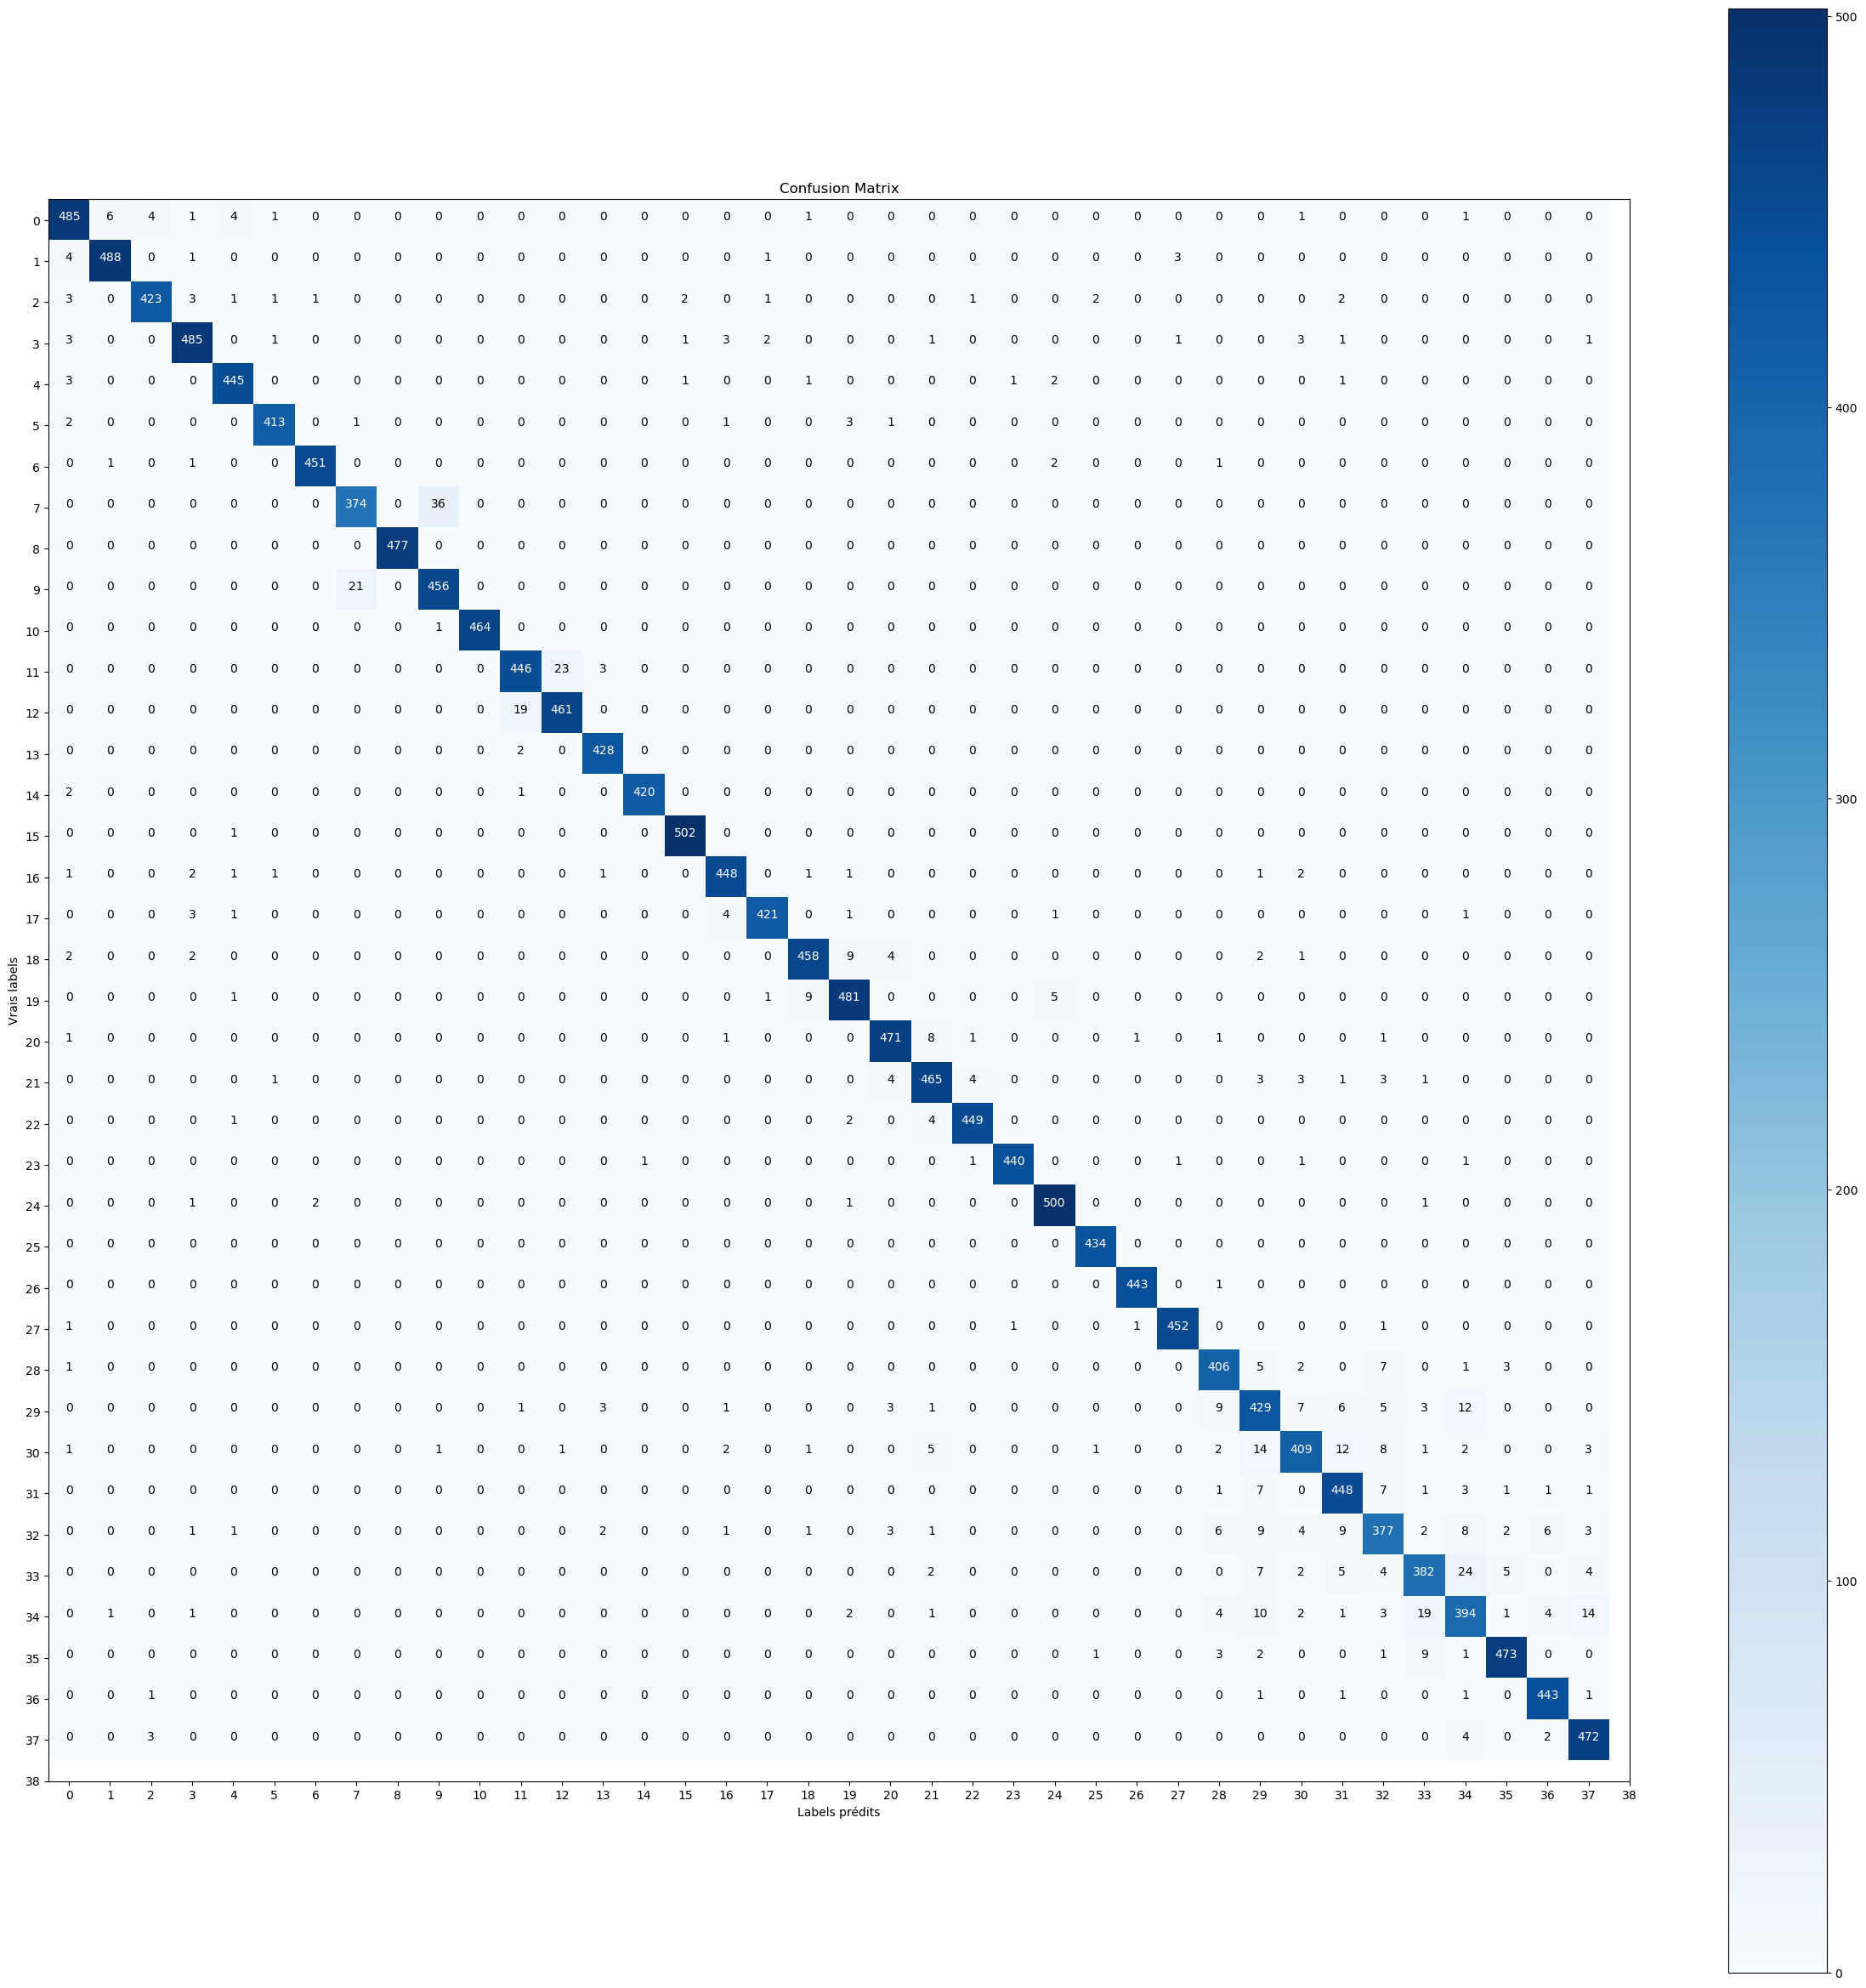

In [71]:
import numpy as np
import itertools

classes=range(0,39)
plt.figure(figsize=(30,30))


plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.show()

In [80]:
import cv2


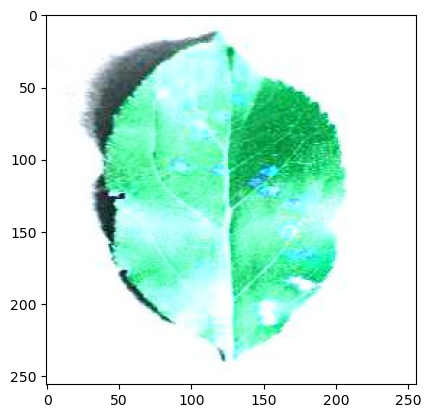

In [102]:
img=cv2.imread("test/AppleCedarRust1.JPG")
plt.imshow(img)


AttributeError: 'BatchDataset' object has no attribute 'shape'

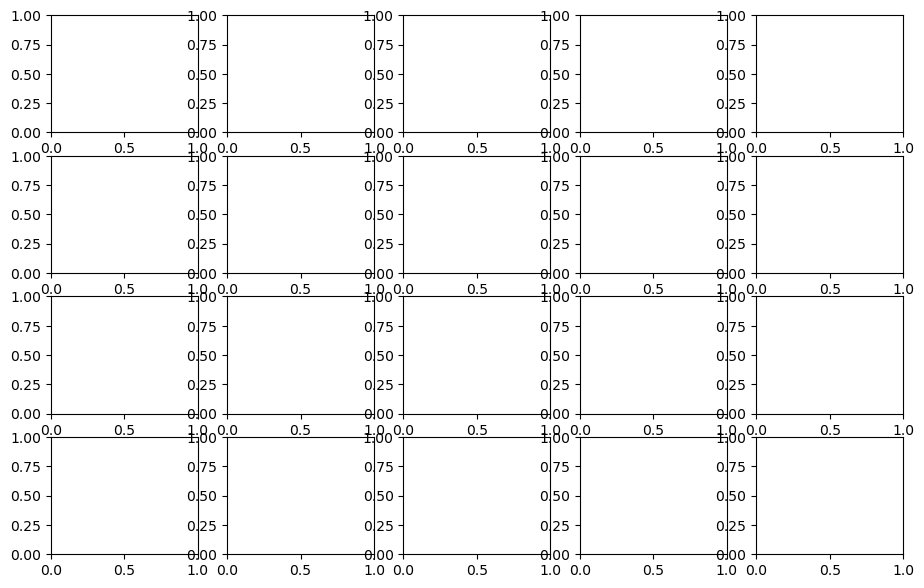

In [108]:
fig, axs = plt.subplots(4, 5, figsize=(11, 7))

for row in range(4):
    for col in range(5):
        indice = np.random.randint(validation_set.shape[0])
        axs[row, col].imshow(X_test[indice].reshape((48,48)), cmap="gray")
        axs[row, col].axis('off')
        axs[row, col].set_title('{} Prédit {}'.format(dict[y_test[indice]], dict[y_pred[indice][0]]))